In [100]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,LassoCV

In [58]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [59]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
train_data.shape

(1460, 81)

In [62]:
test_data.shape

(1459, 80)

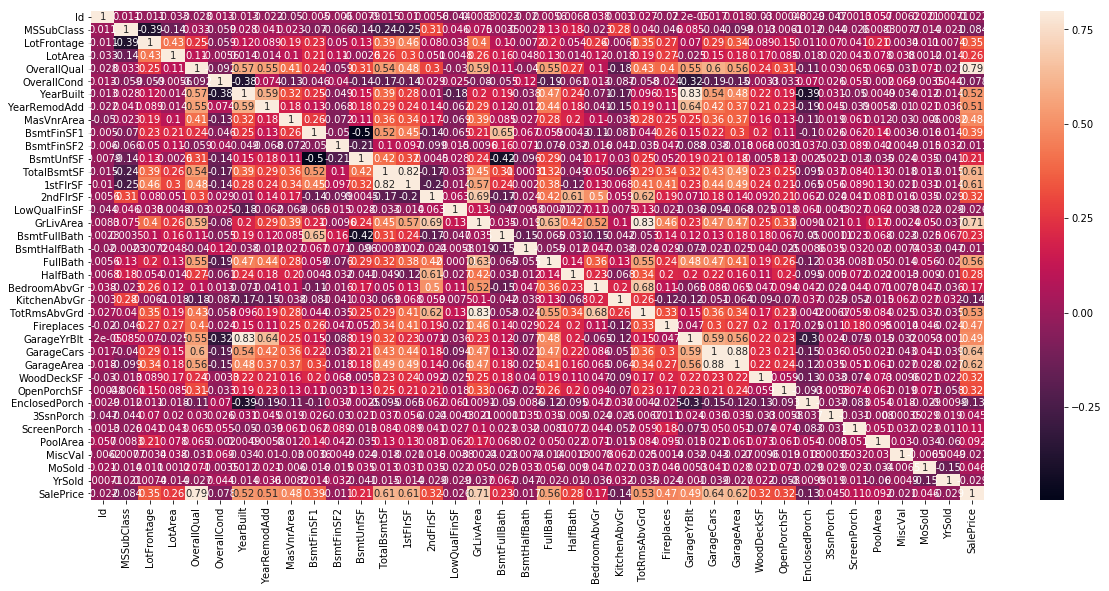

In [63]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax = .8, annot=True);
plt.show()

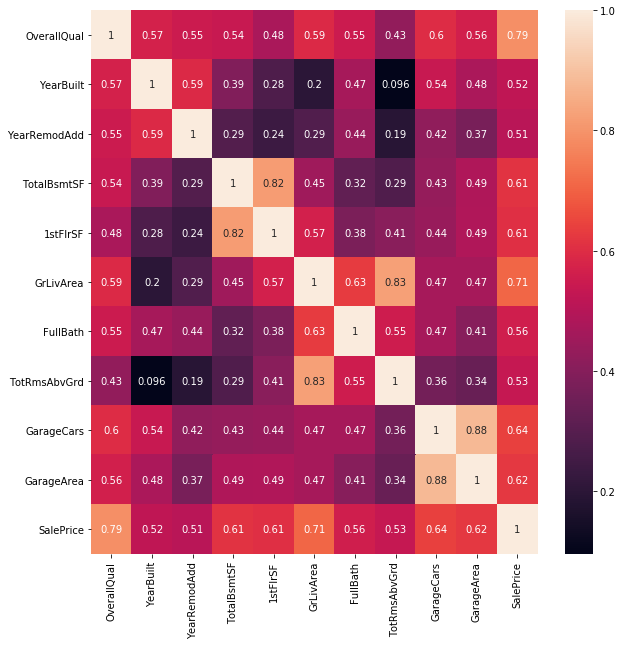

In [64]:
corrmat = train_data.corr()
topCorrelatedFeatures = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10));
g = sns.heatmap(train_data[topCorrelatedFeatures].corr(),annot=True);
plt.show()

Highly correlated features with Sales Price are - 

corrmat = train_data.corr()
corrmat.sort_values(["SalePrice"],ascending=False,inplace = True)
print(corrmat.SalePrice)

In [65]:
TrainDataWithNumber = train_data.select_dtypes(include=[np.number])
TestDataWithNumber = test_data.select_dtypes(include=[np.number])

In [66]:
TrainDataWithNumber.head();
TestDataWithNumber.head();

In [67]:
TrainDataWithNumber.shape

(1460, 38)

In [68]:
TestDataWithNumber.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


* SalePrice        1.000000
* OverallQual      0.790982
* GrLivArea        0.708624
* GarageCars       0.640409
* GarageArea       0.623431
* TotalBsmtSF      0.613581
* 1stFlrSF         0.605852
* FullBath         0.560664
* TotRmsAbvGrd     0.533723
* YearBuilt        0.522897
* YearRemodAdd     0.507101

In [69]:
TrainDataWithNumber.fillna(0,axis=1);
indicesToKeep = ~TrainDataWithNumber.isin([np.nan, np.inf, -np.inf]).any(1)
TrainDataWithNumber = TrainDataWithNumber[indicesToKeep].astype(np.float64)

In [70]:
TestDataWithNumber.fillna(0,axis=1);
indicesToKeep = ~TestDataWithNumber.isin([np.nan, np.inf, -np.inf]).any(1)
TestDataWithNumber = TestDataWithNumber[indicesToKeep].astype(np.float64)

In [71]:
TrainDataWithNumber.shape

(1121, 38)

In [72]:
trainX = TrainDataWithNumber.drop(['SalePrice'], axis=1)
trainX.drop(['Id'],axis =1,inplace=True)
y = np.log1p(TrainDataWithNumber['SalePrice'])

In [73]:
trainX.shape

(1121, 36)

In [74]:
y.shape

(1121,)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(trainX,y,test_size = 0.3,random_state= 0)

In [76]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((784, 36), (337, 36), (784,), (337,))

In [77]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
122,20.0,75.0,9464.0,6.0,7.0,1958.0,1958.0,135.0,570.0,0.0,...,288.0,0.0,0.0,0.0,0.0,130.0,0.0,0.0,6.0,2008.0
150,20.0,120.0,10356.0,5.0,6.0,1975.0,1975.0,0.0,716.0,0.0,...,440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2007.0
950,20.0,60.0,7200.0,5.0,8.0,1950.0,2002.0,0.0,398.0,149.0,...,720.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
46,50.0,48.0,12822.0,7.0,5.0,2003.0,2003.0,0.0,1351.0,0.0,...,670.0,168.0,43.0,0.0,0.0,198.0,0.0,0.0,8.0,2009.0
193,160.0,24.0,2522.0,7.0,5.0,2004.0,2004.0,50.0,0.0,0.0,...,380.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0


In [78]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lr.score(X_test,y_test)

0.73323243451308373

In [80]:
all_data = pd.concat((train_data.loc[:,'MSSubClass':'SaleCondition'],
                      test_data.loc[:,'MSSubClass':'SaleCondition']))

Replace the missing values with mean of the column

In [81]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


Filling the missing data with the mean of the column

In [82]:
all_data = all_data.fillna(all_data.mean())

In [83]:
trainX = all_data[:train_data.shape[0]]
testX = all_data[train_data.shape[0]:]
y = train_data.SalePrice

Using ridge regression on the dataset

In [89]:
trainX.shape

(1459, 288)

In [90]:
testX.shape

(1459, 288)

In [91]:
all_data.shape

(2919, 288)

In [95]:
X_train,X_test,y_train,y_test = train_test_split(trainX,y,test_size = 0.3,random_state= 0)

In [96]:
ridge_clf = Ridge(alpha=1.0)

In [97]:
ridge_clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
ridge_clf.score(X_test,y_test)

0.78409641055315038

In [115]:
lasso_clf = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(trainX, y)

/usr/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


//TODO - Check convergence with alpha later

In [116]:
lasso_clf.score(X_test,y_test)

0.93016974990030843

//TODO - High score does not seems accurate, check this later